<a href="https://colab.research.google.com/github/TamizharasanG/CNN-Implementation/blob/main/Hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand written text classification**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
def plot_image(x, y, index):
  plt.imshow(x[index])
  plt.title(f"The Number is ---> {y[index]}")

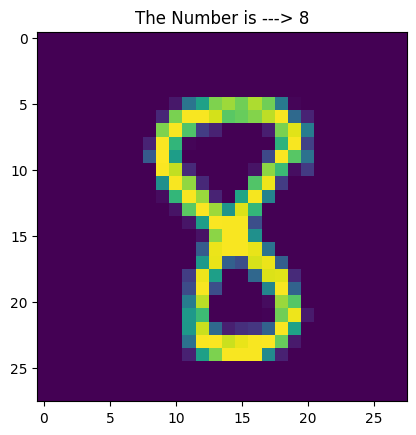

In [6]:
plot_image(X_train, y_train, 50001)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [9]:
#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [10]:
history = model.fit(X_train, y_train, validation_split = 0.3,epochs = 10, callbacks = early_stopping )

Epoch 1/10
1313/1313 [==============================] - 21s 6ms/step - loss: 0.2310 - accuracy: 0.9296 - val_loss: 0.1133 - val_accuracy: 0.9643
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0615 - val_accuracy: 0.9806
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0485 - val_accuracy: 0.9861
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0809 - val_accuracy

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9895


[0.040920551866292953, 0.9894999861717224]

In [15]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [17]:
y_pred_act = []
for i in y_pred:
  y_pred_act.append(np.argmax(i))

**Function for finding the progress of our model visuvally**

---



In [20]:
#Simple function for exploring the data  in the dataset with their classes
def plot_image_verify(x, y, index):
  y_act = y_test
  y_pred_act = []
  for i in y:
    y_pred_act.append(np.argmax(i))
  plt.figure(figsize = (20, 2))
  plt.imshow(x[index])
  plt.title(f"Predicted Number : {y_pred_act[index]}")
  ans = y_act[index]
  plt.xlabel(f"Actual Result : {y_act[index]}")

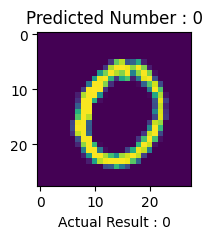

In [24]:
plot_image_verify(X_test, y_pred, 101)